# Introduction
This introduction will introduce you to some methods on how to use the US Census dataset. In particular, we will be examining the intersection of racial and political issues in the United States using this dataset through the example of gerrymandering. Additionally, we will be using geospatial analysis to visualize the information we gather about this issue. This tutorial will highlight the importance of using data science to investigate modern social, economic, and political issues in the United States that affect millions of people. 

## Tutorial Content
- Installing the libraries
- Gerrymandering
  - Loading and examining the data
  - Mapping of US Congressional districts
  - Mapping of Pennsylvania Congressional districts
  - Combining district and race data in Pennsylvania
  - The "Goofy" district
- Summary and references

### Installing the libraries
Before we begin, you will need to have certain libraries installed. To use the US Census Data we will be working with Pandas and Matplotlib (which are already built-in to Python), and to visualize our findings we will be using GeoPandas to perform our geospatial analysis. 

First, let's install our geospatial library using pip. 
Then, we can import all the libraries we'll be using.

In [ ]:
# installing our geospatial library using pip
!pip install --upgrade geopandas

# importing all the libraries we will be using
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import re
import os

## Gerrymandering
Gerrymandering is the practice of political parties establishing unfair political advantages by manipulating the boundaries of electoral districts. Given an electoral district, it is common practice by both the Democratic and Republican parties to use gerrymandering to unfairly win districts. Instead of having a majority rule on which party wins a district, gerrymandering can sway the win either way.

We will use data from the US Census dataset about the 115th congressional districts and the racial characteristics of people in these districts to get a sense of what gerrymandering looks like. We will focus in on the state of Pennsylvania. 

I used the web interface of the US Census data site to search for and download the required files. Then, I uploaded them locally for easy access. 

### Loading and examining the data
First, we need to mount the drive in order to access the datasets saved locally in Google Drive. 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
os.chdir("drive/My Drive/Colab Notebooks/15-688")

Mounted at /content/drive


Now, we can access the files.

Here are the links the tables I downloaded for this tutorial:
- Citizen Voting Age by Race and Ethnicity 2013-2017 for the 115th ongressional districts (saved as "CD.csv"): 
  - https://www.census.gov/programs-surveys/decennial-census/about/voting-rights/cvap.2017.html
- Shape file for 115th congressional districts (saved as "shapes"):
  - https://www2.census.gov/geo/tiger/TIGER2017/CD/

In [ ]:
# Citizen Voting Age by Race and Ethnicity 2013-2017 by Congressional District (for the 115th districts)
cvap_115 = pd.read_csv("CD.csv")

print(cvap_115.shape)
cvap_115.head()

(5681, 12)


,GEONAME,LNTITLE,GEOID,LNNUMBER,TOT_EST,TOT_MOE,ADU_EST,ADU_MOE,CIT_EST,CIT_MOE,CVAP_EST,CVAP_MOE
0,"Congressional District 1 (115th Congress), Ala...",Total,50000US0101,1,702730,655,539390,468,692770,1230,530645,1095
1,"Congressional District 1 (115th Congress), Ala...",Not Hispanic or Latino,50000US0101,2,681100,658,525225,480,674880,989,519675,885
2,"Congressional District 1 (115th Congress), Ala...",American Indian or Alaska Native Alone,50000US0101,3,6905,539,5470,461,6865,517,5430,441
3,"Congressional District 1 (115th Congress), Ala...",Asian Alone,50000US0101,4,10660,549,7925,405,7475,560,5240,473
4,"Congressional District 1 (115th Congress), Ala...",Black or African American Alone,50000US0101,5,194215,796,140785,512,193645,849,140210,601


### Examining the data

Let's take a look at what we're working with.

Going over our variables:
- GEONAME: The name of the geographic area, like "Congressional District 1 (115th Congress), Alabama".
- LNTITLE: The description of the line, such as “Not Hispanic or Latino” or “Asian and White”.
- GEOID: The identification number of the geographic area for this line.
- LNNUMBER: The number for the line in the table.

Next, we have columns in the format *{TOT, ADU, CIT, CVAP}*_EST and *{TOT, ADU, CIT, CVAP}*_MOE. 

EST signifies the rounded estimate for the group and MOE signifies the margin of error for the group, both to their corresponding geographic areas. 
- TOT: Total number of people.
- ADU: Total number of people 18 years of age or older.
- CIT: Total number of United States citizens.
- CVAP: Total number of United States citizens 18 years of age or older.

In [ ]:
# shape file for 115th congressional districts
shapes = gpd.read_file("tl_2017_us_cd115.zip")

print(shapes.shape)
shapes.head()

(444, 13)


,STATEFP,CD115FP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,27,07,2707,Congressional District 7,C2,115,G5200,N,86581180363,5057706724,+46.5530202,-095.6759048,"POLYGON ((-97.23909 48.96826, -97.23909 48.968..."
1,27,02,2702,Congressional District 2,C2,115,G5200,N,6314196469,243534838,+44.4789680,-092.8530418,"POLYGON ((-93.91131 44.54651, -93.91024 44.548..."
2,27,06,2706,Congressional District 6,C2,115,G5200,N,7463332695,405721162,+45.3368069,-093.8520551,"POLYGON ((-94.64041 45.37072, -94.64039 45.371..."
3,27,08,2708,Congressional District 8,C2,115,G5200,N,72279889700,12450296907,+47.2503395,-092.9638683,"POLYGON ((-95.18322 47.41277, -95.16598 47.412..."
4,17,01,1701,Congressional District 1,C2,115,G5200,N,669233988,2069827,+41.5466708,-087.8357472,"POLYGON ((-88.13677 41.42285, -88.13633 41.422..."


Now, let's go over the variables in our shape file, which are a little bit more complicated. 
- STATEFP: Current state FIPS code.
- CD115FP: 115th congressional district FIPS code.
- GEOID: 115th congressional district identifier.
- NAMELSAD: Current name and the translated legal/statistical area
description for congressional district.
- LSAD: Current legal/statistical area description code for
congressional district.
- CDSESSN: Congressional session code.
- MTFCC: MAF/TIGER Feature Class Code (G5200). 
- FUNCSTAT: Current functional status.
- ALAND: Current land area.
- AWATER: Current water area.
- INTPTLAT: Current latitude of the internal point.
- INTPTLON: Current longitude of the internal point.
- geometry: Shape of area.

Here in our shape file, we are dealing with a GeoDataFrame, which has some unique elements. For example, the last column ```geometry``` has a Shapely polygon type object, which describes the geometry of the geographic area as a list of points. 

### Mapping of US Congressional districts

Nice, so we have our data loaded. First, let's see what the 115th congressional districts look like. Then, we can combine the race and shape data to examine race in the districts. Let's begin with examining our GeoDataFrame ```shapes```.

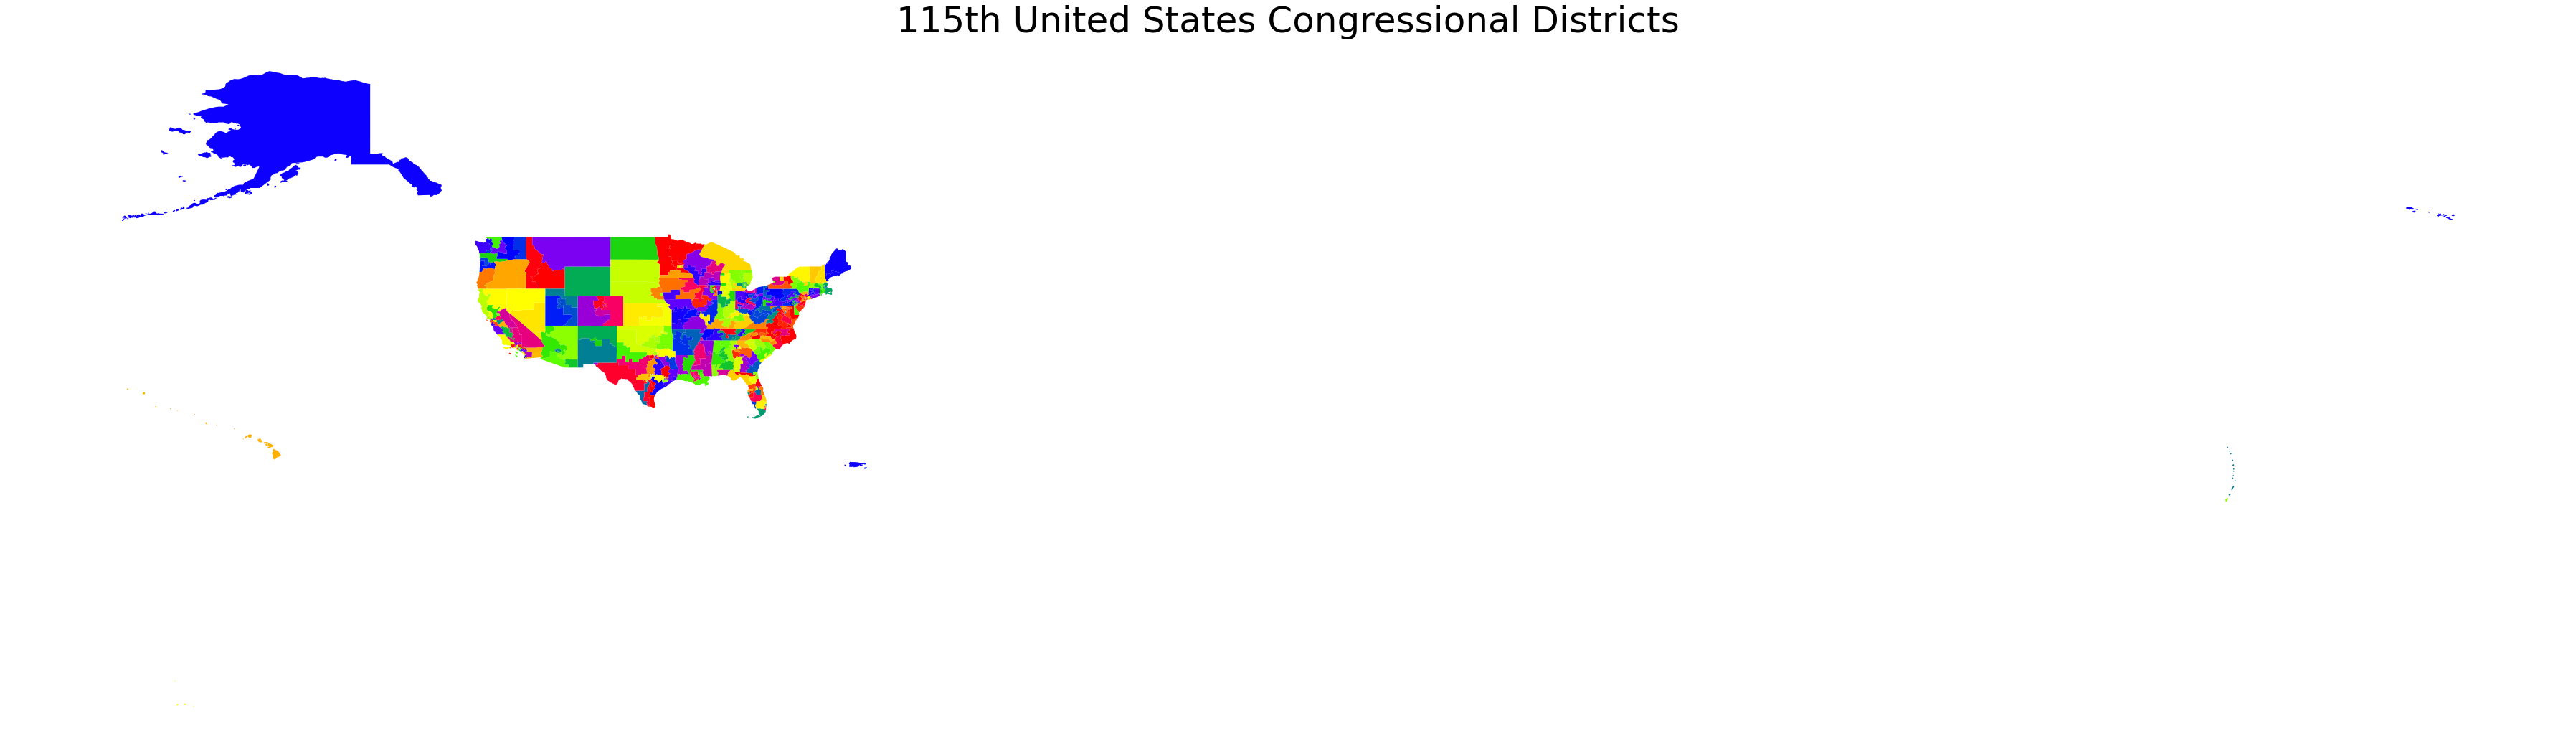

In [ ]:
# plotting and ~pretty~ formatting
fig, ax = plt.subplots(figsize = (50, 25))
shapes.plot(ax = ax, cmap = "prism")
ax.set_title("115th United States Congressional Districts", fontsize = 50)
ax.axis("off")
plt.tight_layout()
plt.savefig("115th_cd.png")

### Mapping of Pennsylvania Congressional districts

It's pretty difficult to make out the districts, so let's just focus on one state to get a better sense of the details of this map. Let's focus on Pennsylvania. We'll do this by subsetting the rows where ```STATEFP``` is equal to the Pennsylvania FIPS, which we find is 42 with a quick Google search.


In [ ]:
# pennsylvania 115th congressional districts
penn_cds = shapes[shapes["STATEFP"] == "42"]

penn_cds.head()

,STATEFP,CD115FP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
316,42,01,4201,Congressional District 1,C2,115,G5200,N,202017297,30946404,+39.9277355,-075.2142852,"POLYGON ((-75.41830 39.85615, -75.41778 39.856..."
317,42,18,4218,Congressional District 18,C2,115,G5200,N,5368517141,17435303,+40.1705353,-080.0275169,"POLYGON ((-80.51950 39.74432, -80.51949 39.744..."
318,42,07,4207,Congressional District 7,C2,115,G5200,N,2233770399,21529041,+40.0415947,-076.1779227,"POLYGON ((-76.18406 40.04295, -76.17631 40.044..."
319,42,02,4202,Congressional District 2,C2,115,G5200,N,191878241,3607903,+40.0155501,-075.2222337,"POLYGON ((-75.34917 40.05303, -75.34855 40.053..."
320,42,17,4217,Congressional District 17,C2,115,G5200,N,4488179340,58691914,+40.8854972,-075.7970882,"POLYGON ((-76.70162 40.65808, -76.70135 40.659..."


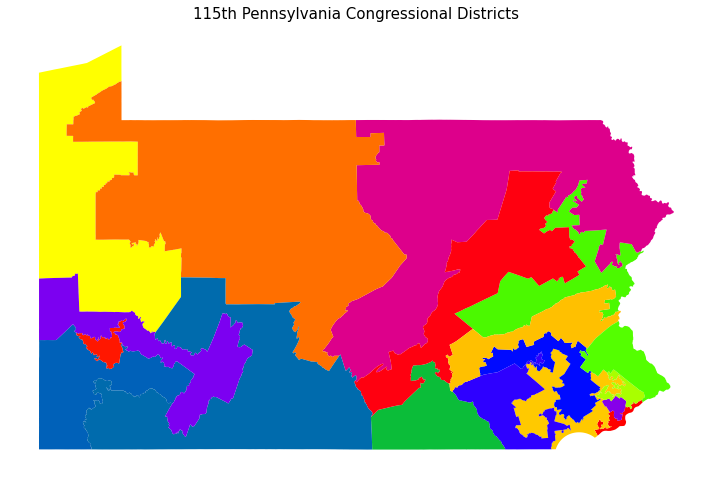

In [ ]:
# now we plot again!
fig, ax = plt.subplots(figsize = (10, 10))
penn_cds.plot(ax = ax, cmap = "prism")
ax.set_title("115th Pennsylvania Congressional Districts", fontsize = 15)
ax.axis("off")
plt.tight_layout()
plt.savefig("penn_cds.png")

### Combining district and race data in Pennsylvania

Cool, those are our state congressional districts! Now that we have a sense of the districts, let's combine the district data with the race data and visualize it. We will join the tables on ```GEOID```. Since the ```cvap_115``` form of the column is in a slightly different form than the ```shapes``` one, we will edit the ```cvap_115``` form of the column and then join the tables.  

In [ ]:
# editing the cvap_115 GEOID column to match shapes
cvap_115["GEOID"] = cvap_115["GEOID"].apply(lambda x: re.sub("50000US", "", str(x)))

0    0101
1    0101
2    0101
3    0101
4    0101
Name: GEOID, dtype: object

In [ ]:
# merge of tables on the same GEOID
race_115 = pd.merge(shapes, cvap_115, on = "GEOID")

race_115.head()

,STATEFP,CD115FP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GEONAME,LNTITLE,LNNUMBER,TOT_EST,TOT_MOE,ADU_EST,ADU_MOE,CIT_EST,CIT_MOE,CVAP_EST,CVAP_MOE
0,27,07,2707,Congressional District 7,C2,115,G5200,N,86581180363,5057706724,+46.5530202,-095.6759048,"POLYGON ((-97.23909 48.96826, -97.23909 48.968...","Congressional District 7 (115th Congress), Min...",Total,1,663305,537,507530,470,649940,1149,496330,916
1,27,07,2707,Congressional District 7,C2,115,G5200,N,86581180363,5057706724,+46.5530202,-095.6759048,"POLYGON ((-97.23909 48.96826, -97.23909 48.968...","Congressional District 7 (115th Congress), Min...",Not Hispanic or Latino,2,633400,642,490445,500,626460,1066,485040,790
2,27,07,2707,Congressional District 7,C2,115,G5200,N,86581180363,5057706724,+46.5530202,-095.6759048,"POLYGON ((-97.23909 48.96826, -97.23909 48.968...","Congressional District 7 (115th Congress), Min...",American Indian or Alaska Native Alone,3,17930,468,11645,300,17895,475,11610,302
3,27,07,2707,Congressional District 7,C2,115,G5200,N,86581180363,5057706724,+46.5530202,-095.6759048,"POLYGON ((-97.23909 48.96826, -97.23909 48.968...","Congressional District 7 (115th Congress), Min...",Asian Alone,4,5605,283,4195,220,3790,255,2505,217
4,27,07,2707,Congressional District 7,C2,115,G5200,N,86581180363,5057706724,+46.5530202,-095.6759048,"POLYGON ((-97.23909 48.96826, -97.23909 48.968...","Congressional District 7 (115th Congress), Min...",Black or African American Alone,5,8430,435,5245,260,6060,442,3765,281


Now that we have merged the tables, let's visualize it by plotting! We want to plot the same congressional district map we had before, but this time, overlay our race data so we can see racial groups in each area. 

Again, let's focus on Pennsylvania instead of the whole country to get a better sense of the results. We will use the idea that we can isolate a state based off of its FIPS number again (Pennsylvania's FIPS is 42).

In [ ]:
race_penn_cds = race_115[race_115["STATEFP"] == "42"]
race_penn_cds.head()

,STATEFP,CD115FP,GEOID,NAMELSAD,LSAD,CDSESSN,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GEONAME,LNTITLE,LNNUMBER,TOT_EST,TOT_MOE,ADU_EST,ADU_MOE,CIT_EST,CIT_MOE,CVAP_EST,CVAP_MOE
4030,42,01,4201,Congressional District 1,C2,115,G5200,N,202017297,30946404,+39.9277355,-075.2142852,"POLYGON ((-75.41830 39.85615, -75.41778 39.856...","Congressional District 1 (115th Congress), Pen...",Total,1,723040,5502,555380,3981,671830,5490,509450,3926
4031,42,01,4201,Congressional District 1,C2,115,G5200,N,202017297,30946404,+39.9277355,-075.2142852,"POLYGON ((-75.41830 39.85615, -75.41778 39.856...","Congressional District 1 (115th Congress), Pen...",Not Hispanic or Latino,2,598045,4749,473715,3369,561285,4898,440565,3600
4032,42,01,4201,Congressional District 1,C2,115,G5200,N,202017297,30946404,+39.9277355,-075.2142852,"POLYGON ((-75.41830 39.85615, -75.41778 39.856...","Congressional District 1 (115th Congress), Pen...",American Indian or Alaska Native Alone,3,1155,313,1040,294,1110,319,995,297
4033,42,01,4201,Congressional District 1,C2,115,G5200,N,202017297,30946404,+39.9277355,-075.2142852,"POLYGON ((-75.41830 39.85615, -75.41778 39.856...","Congressional District 1 (115th Congress), Pen...",Asian Alone,4,51875,1697,41320,1389,36370,1422,26930,1050
4034,42,01,4201,Congressional District 1,C2,115,G5200,N,202017297,30946404,+39.9277355,-075.2142852,"POLYGON ((-75.41830 39.85615, -75.41778 39.856...","Congressional District 1 (115th Congress), Pen...",Black or African American Alone,5,252420,4102,183665,2684,238780,4050,171995,2641


Next, let's focus on one racial group, "Black or African American Alone", to get an idea of the population distribution of this group across Pennsylvania. We will filter for this race value in the ```LNTITLE``` column, and focus on the values of longitude (```INTPTLON```), latitude (```INTPTLAT```), and total citizen voting age population (```CVAP_EST```) for this group. 

In [ ]:
aa_l = list()

aa_sub = race_penn_cds[race_penn_cds["LNTITLE"] == "Black or African American Alone"]
for index, row in aa_sub.iterrows():
  # get the latitude, longitude, and cvap
  lon = float(row["INTPTLON"])
  lat = float(row["INTPTLAT"])
  c = float(row["CVAP_EST"])
  to_add = [lon, lat, c]
  aa_l.append(to_add)

aa_df = pd.DataFrame(aa_l, columns = ["longitude", "latitude", "aa_cvap"])

aa_df.head()

,longitude,latitude,aa_cvap
0,-75.214285,39.927735,171995.0
1,-80.027517,40.170535,11845.0
2,-76.177923,40.041595,28595.0
3,-75.222234,40.015550,306085.0
4,-75.797088,40.885497,27350.0


Now we have a Pandas dataframe, ```aa_df```, that contains longitudes, latitudes, and citizen voting age populations for African-Americans in Pennsylvania. We can plot this as a scatterplot, with ```aa_cvap``` as the size of each point, to see the locations and group sizes of African-American citizens that can vote in Pennsylvania. 

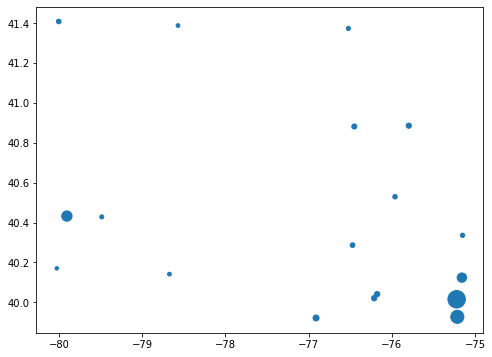

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(x = aa_df["longitude"], y = aa_df["latitude"], s = aa_df["aa_cvap"]/1000)
plt.show()

Let's plot this over our state congressional districts to see the African-American citizen voting-age populations across districts in Pennsylvania. I'm going to make the state districts plot grayscale to see the dots better, and also add in markers for Philadelphia and Pittsburgh.

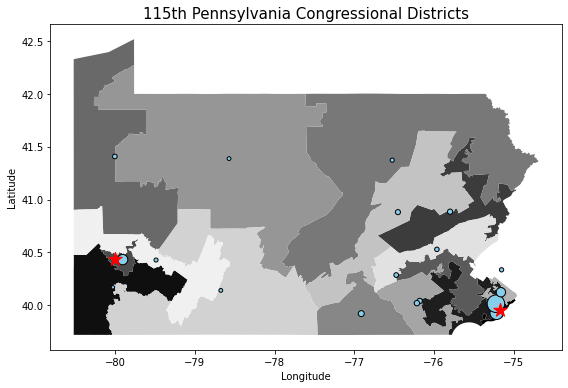

In [ ]:
# Philadelphia and Pittsburgh longitudes, latitudes (from websearch)
phil_lon, phil_lat = -75.1652, 39.9526
pitt_lon, pitt_lat = -79.9959, 40.4406

# plotting with African-American group
fig, ax = plt.subplots(figsize = (8, 6))
penn_cds.plot(ax = ax, cmap = "gray")
ax.set_title("115th Pennsylvania Congressional Districts", fontsize = 15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.scatter(x = aa_df["longitude"], y = aa_df["latitude"], 
            s = aa_df["aa_cvap"]/1000, c = "skyblue", 
            edgecolors = "black")

# adding the two cities as markers
plt.scatter(x = np.array([phil_lon, pitt_lon]), 
            y = np.array([phil_lat, pitt_lat]), 
            c = "red", marker = "*", s = 200)

Next let's add other racial groups to their distributions as well. We will use a for loop with the previous code so we don't have to repeat the process of getting longitudes, latitudes, and cvap estimates for each racial group. 

In [ ]:
# our racial groups
print(set(race_penn_cds["LNTITLE"]))

{'Total', 'White Alone', 'Black or African American Alone', 'Asian Alone', 'Black or African American and White', 'American Indian or Alaska Native and Black or African American', 'American Indian or Alaska Native and White', 'Remainder of Two or More Race Responses', 'Asian and White', 'American Indian or Alaska Native Alone', 'Native Hawaiian or Other Pacific Islander Alone', 'Not Hispanic or Latino', 'Hispanic or Latino'}


In [ ]:
# let's do the "Alone" groups:
    # "White Alone", "Asian Alone", "American Indian or Alaska Native Alone", "Black or African American Alone",
    # "Native Hawaiian or Other Pacific Islander Alone", and "Hispanic or Latino"
groups = ["White Alone", "Asian Alone", "American Indian or Alaska Native Alone", "Black or African American Alone", "Native Hawaiian or Other Pacific Islander Alone", "Hispanic or Latino"]

g_list = list()

for g in groups:
  g_sub = race_penn_cds[race_penn_cds["LNTITLE"] == g]
  for index, row in g_sub.iterrows():
    lon = float(row["INTPTLON"])
    lat = float(row["INTPTLAT"])
    c = float(row["CVAP_EST"])
    race = g
    to_add = [lon, lat, c, race]
    g_list.append(to_add)

race_df = pd.DataFrame(g_list, columns = ["longitude", "latitude", "r_cvap", "race"])

print(race_df.shape)
race_df.head()

(108, 4)


,longitude,latitude,r_cvap,race
0,-75.214285,39.927735,234145.0,White Alone
1,-80.027517,40.170535,527280.0,White Alone
2,-76.177923,40.041595,474740.0,White Alone
3,-75.222234,40.015550,180020.0,White Alone
4,-75.797088,40.885497,468495.0,White Alone


And now, we plot again, this time with all "alone" racial groups. 

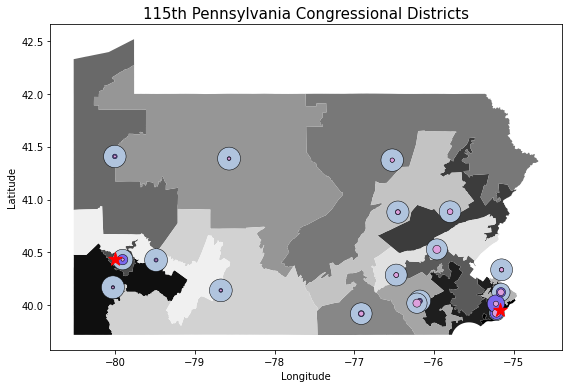

In [ ]:
# plotting with all our racial groups
fig, ax = plt.subplots(figsize = (8, 6))
penn_cds.plot(ax = ax, cmap = "gray")
ax.set_title("115th Pennsylvania Congressional Districts", fontsize = 15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

# mapping races to color groups (5 groups), cool-toned
colors = ["lightsteelblue", "royalblue", "midnightblue", "mediumslateblue", "darkviolet", "plum"] 
c_map = dict(zip(groups, colors))

plt.scatter(x = race_df["longitude"], y = race_df["latitude"], 
            s = race_df["r_cvap"]/1000, c = race_df["race"].map(c_map), 
            edgecolors = "black", linewidths = 0.5, label = c)

# adding the two cities as markers
plt.scatter(x = np.array([phil_lon, pitt_lon]), 
            y = np.array([phil_lat, pitt_lat]), 
            c = "red", marker = "*", s = 200)

Here we can see the white population (light blue) largely overtakes all other populations, and there is more diversity closer to the cities, especially Philadelphia. 

Let's zoom in on Philadelphia to get a clearer look. We do this by replotting with our longitudes and latitudes restricted to the Philadelphia area. First, let's filter our data to within the restricted values, longitude greather than -76.5 and latitude less than 40.6.


In [ ]:
# subsetting penn_cds and race_df to within (lon > -76.5 and lat < 40.6) 
  # first adding lon, lat columns to penn_cds
penn_cds["lons"] = pd.DataFrame(penn_cds["INTPTLON"].astype(str).astype(float))
penn_cds["lats"] = pd.DataFrame(penn_cds["INTPTLAT"].astype(str).astype(float))

# filtering the rows based on lons, lats
sub_lats = penn_cds.where(penn_cds["lats"] < 40.6)
sub_lons = sub_lats.where(sub_lats["lons"] > -76.5)
phil_penn_cds = sub_lons.dropna()

r1 = race_df.where(race_df["longitude"] > -76.5)
r2 = r1.where(r1["latitude"] < 40.6)
phil_race_df = r2.dropna()

Now, let's plot the Philadelphia region.

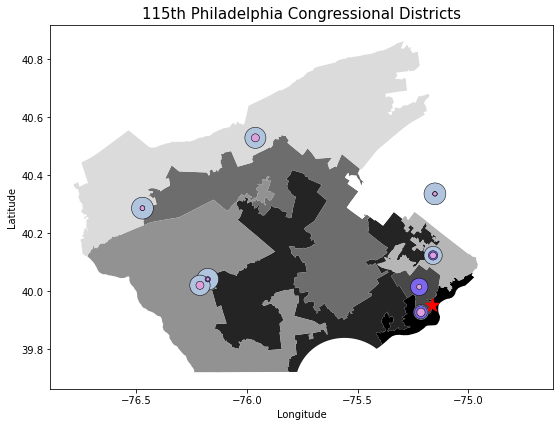

In [ ]:
# plotting with all our racial groups
fig, ax = plt.subplots(figsize = (8, 6))
phil_penn_cds.plot(ax = ax, cmap = "gray")
ax.set_title("115th Philadelphia Congressional Districts", fontsize = 15)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

# mapping races to color groups (5 groups), cool-toned
colors = ["lightsteelblue", "royalblue", "midnightblue", "mediumslateblue", "darkviolet", "plum"] 
c_map = dict(zip(groups, colors))

plt.scatter(x = phil_race_df["longitude"], y = phil_race_df["latitude"], 
            s = phil_race_df["r_cvap"]/1000, c = phil_race_df["race"].map(c_map), 
            edgecolors = "black", linewidths = 0.5, label = c)

# adding the city of Philadelphia
plt.scatter(x = phil_lon, y = phil_lat, c = "red", marker = "*", s = 200)

### The "Goofy" district

Look at this district map. Do you see anything particularly strange? A little goofy even? 

Well, the 7th Congressional District of Pennsylvania was a well-known joke due to its shape, and it existed because of gerrymandering. The district appears in the previous map and is the one shown here:

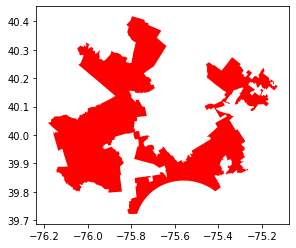

In [ ]:
goofy = phil_penn_cds[phil_penn_cds["NAMELSAD"] == "Congressional District 7"]
goofy.plot(color = "red")

Basically, the district had this shape to ensure a Republican congressman kept the seat. Instead of keeping natural communities intact, it sliced into five different counties and 26 municipalities. It's nickname is "Goofy Kicking Donald Duck", for well... obvious reasons. 

You can read more about it here:
- https://www.nytimes.com/2018/01/26/us/pennsylvania-gerrymander-goofy-district.html

It's one of the United States' worst gerrymandering offenses. Now, let's put it in the context of race and make some observations. 

As you can see from our Pennsylvania congressional district map, it excludes many minority groups near the city and extends oddly outward into suburban/rural areas. Let's look at the numbers on this:



In [ ]:
goof_race = race_115[race_115["GEONAME"] == "Congressional District 7 (115th Congress), Pennsylvania"]
goofball = (goof_race.groupby(["LNTITLE"])["CVAP_EST"].sum()/goof_race["CVAP_EST"].sum())*100
goofball_df = pd.DataFrame(goofball).reset_index()
print(goofball_df[goofball_df["LNTITLE"].isin(groups)])

                                            LNTITLE   CVAP_EST
0            American Indian or Alaska Native Alone   0.019004
3                                       Asian Alone   1.144294
5                   Black or African American Alone   1.781709
7                                Hispanic or Latino   0.738666
8   Native Hawaiian or Other Pacific Islander Alone   0.002181
12                                      White Alone  29.580291


We can see that, out of our racial groups we've been examining, the majority percentage is white compared to the other percentages. Now, let's compare these percentages to the 7th district with the addition of its closest surrounding districts, the 1st, 2nd, and 13th.

In [ ]:
g_7 = race_115[race_115["GEONAME"] == "Congressional District 7 (115th Congress), Pennsylvania"]
g_1 = race_115[race_115["GEONAME"] == "Congressional District 1 (115th Congress), Pennsylvania"]
g_2 = race_115[race_115["GEONAME"] == "Congressional District 2 (115th Congress), Pennsylvania"]
g_13 = race_115[race_115["GEONAME"] == "Congressional District 13 (115th Congress), Pennsylvania"]

# combining the data for the 7th, 1st, 2nd, and 13th districts
non_goof = g_7.append(g_1).append(g_2).append(g_13)

non_g_per = (non_goof.groupby(["LNTITLE"])["CVAP_EST"].sum()/non_goof["CVAP_EST"].sum())*100
non_g_df = pd.DataFrame(non_g_per).reset_index()
print(non_g_df[non_g_df["LNTITLE"].isin(groups)])

                                            LNTITLE   CVAP_EST
0            American Indian or Alaska Native Alone   0.053220
3                                       Asian Alone   1.602785
5                   Black or African American Alone   9.680916
7                                Hispanic or Latino   2.449504
8   Native Hawaiian or Other Pacific Islander Alone   0.007487
12                                      White Alone  19.907785


Wow! That's an approximate 10% decrease in the percentage of the white population, just by adding a few small, neighboring districts that make the district a non-abstract shape. 

When the "goofy" district was re-districted in 2018, a Democrat defeated the Republican holder of the seat. 

Although the racial aspect of gerrymandering is debatable, it's interesting to look at cases like the "goofy" district and the racial data behind it. When the district was drawn like that, Republican lawmakers purposely made weird boundaries to rope in more conservatives. They also happened to rope in more white people and exclude more minorities. The question of whether this was intentional or not, however, remains unanswered. 

### Summary and references
This tutorial walked you through a socio-political example of how to use US Census data. It showed the importance of using this dataset in examining and gathering insights about major social, economic, and political issues in the United States, issues which affect every person in the country in some way. Below, there are a few more examples of utilizing US Census data to tackle other national issues. 
1. Education: https://python.plainenglish.io/my-first-python-project-6ee3b3640110
2. Business: https://commercedataservice.github.io/tutorial_biz_dynamics/
3. Housing: https://commercedataservice.github.io/tutorial_zillow_acs/

More information about the libraries used in this tutorial:
- GeoPandas: http://geopandas.org
- Pandas: https://pandas.pydata.org/docs/
- Matplotlib: https://matplotlib.org/
- Numpy: https://numpy.org/doc/

I gathered my data using the US Census data website, but you can also use their APIs! Here are the available APIs:
- https://www.census.gov/data/developers/data-sets.html

User guide for the Census Data API:
- https://www.census.gov/data/developers/guidance/api-user-guide.html

And finally, here's some more information about gerrymandering in Pennsylvania, if you're interested:
- https://www.inquirer.com/philly/news/politics/state/pennsylvania-gerrymandering-case-congressional-redistricting-map-coverage-guide-20180615.html
- https://www.phillytrib.com/news/across_america/court-decision-could-set-up-fights-over-race-gerrymandering/article_a2faf16f-8585-533f-882b-3d40fa70adc6.html
